In [202]:
import numpy as np
import matplotlib.pyplot as plt

In [203]:
def extractInfo(line):
    """Extracts information from line which is in format
    -> Data Time #follower 'followers'"""
    parts = line.split(' ')
    date = ' '.join(parts[:2])
    followerNum = parts[2]
    
    return (date, followerNum)

In [204]:
# contains information in format (date, followerNum)
information = []

with open('./followerNum.txt') as follFile:
    for line in follFile:
        information.append(extractInfo(line))
        
dates = [info[0] for info in information]
followerNum = [int(info[1].replace(',', '')) for info in information]

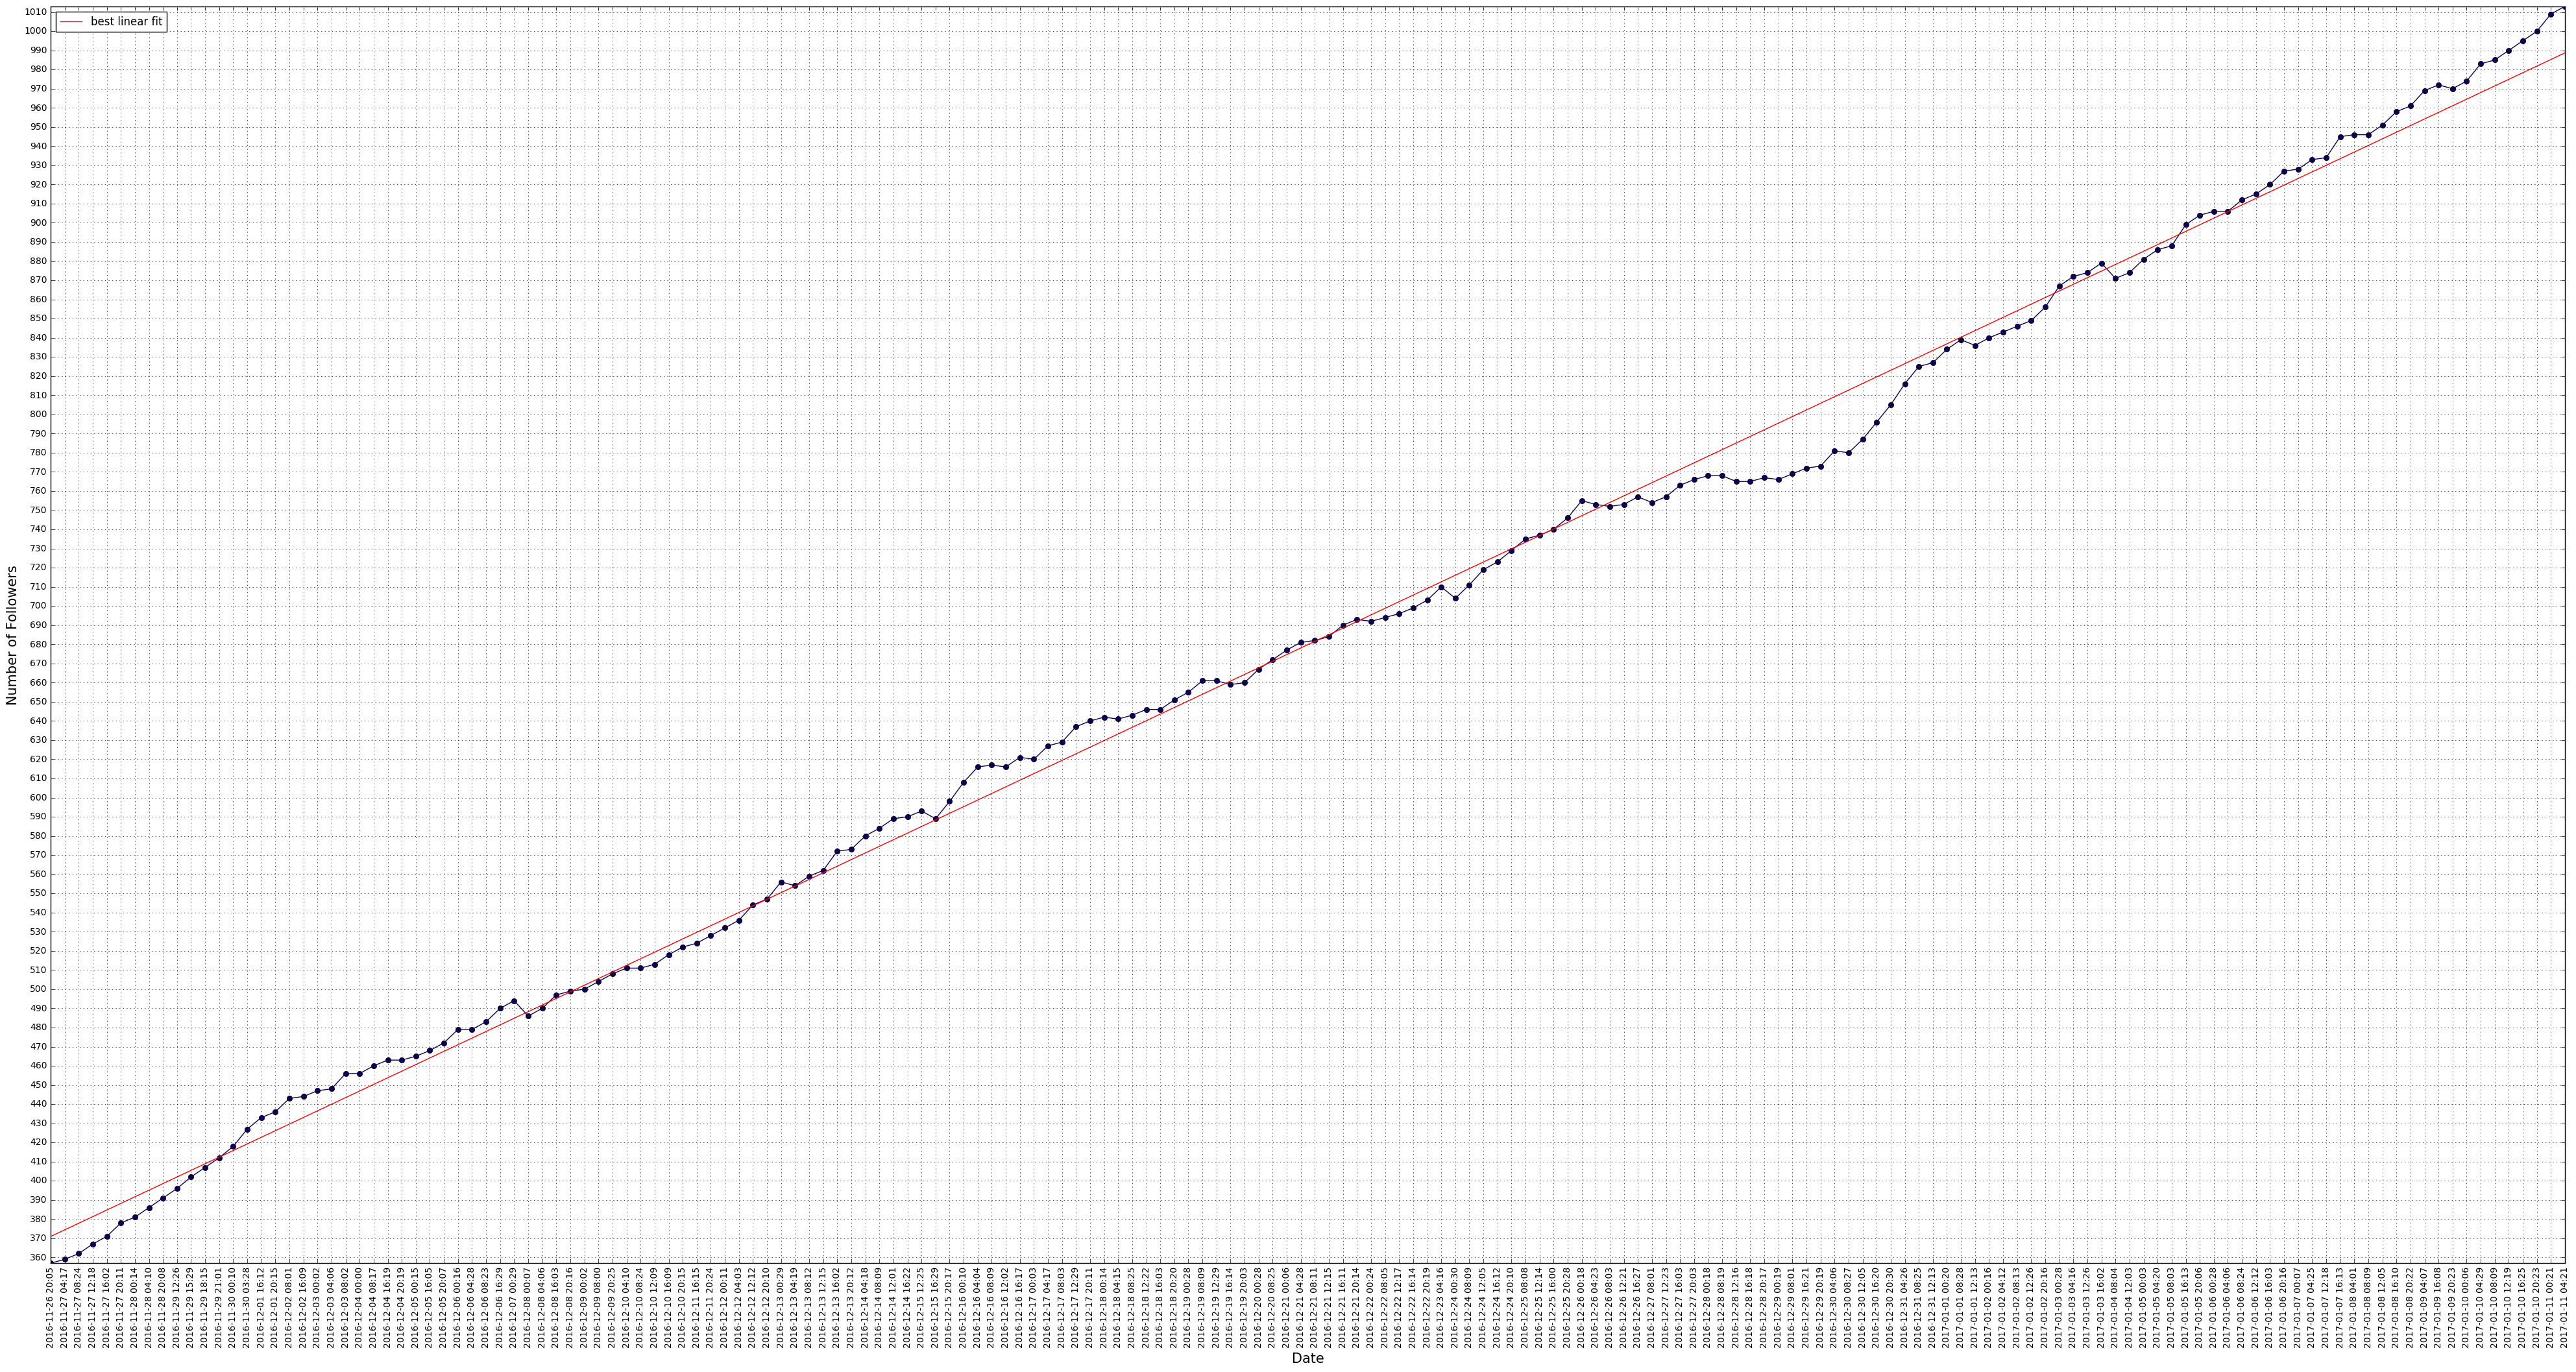

In [205]:
from sklearn import linear_model

plt.figure(figsize=(50, 25))
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Followers', fontsize=15)
plt.grid(True)

#plot the line
plt.plot(range(len(dates)), followerNum, marker='o', color="#0c005c")

#get the lowerbound "rounded down to 100"
lowerbound = int(followerNum[0])
lowerbound -= int(followerNum[0]) % 100

#get the upperbound "rounded up to 100"
upperbound = int(followerNum[-1])
upperbound -= int(followerNum[-1]) % -100

plt.xticks(range(len(dates)), dates, rotation='vertical')
plt.yticks(range(lowerbound, upperbound + 1, 10))

features=np.transpose(np.atleast_2d(np.arange(len(dates))))
targets = followerNum

regressor=linear_model.LinearRegression()
regressor.fit(features,targets)

linearpred=regressor.predict(features)
plt.plot(features,linearpred,'r',label='best linear fit')

plt.legend(loc=2,numpoints=1)
plt.show()

In [206]:
start_val = features[-1][0]

print 'Predicted follower num for the next steps: '
for i in range(1, 11):
    print str(i) + ' - ' + str(regressor.predict(start_val + i)[0])

Predicted follower num for the next steps: 
1 - 992.153320919
2 - 995.60449328
3 - 999.055665641
4 - 1002.506838
5 - 1005.95801036
6 - 1009.40918273
7 - 1012.86035509
8 - 1016.31152745
9 - 1019.76269981
10 - 1023.21387217


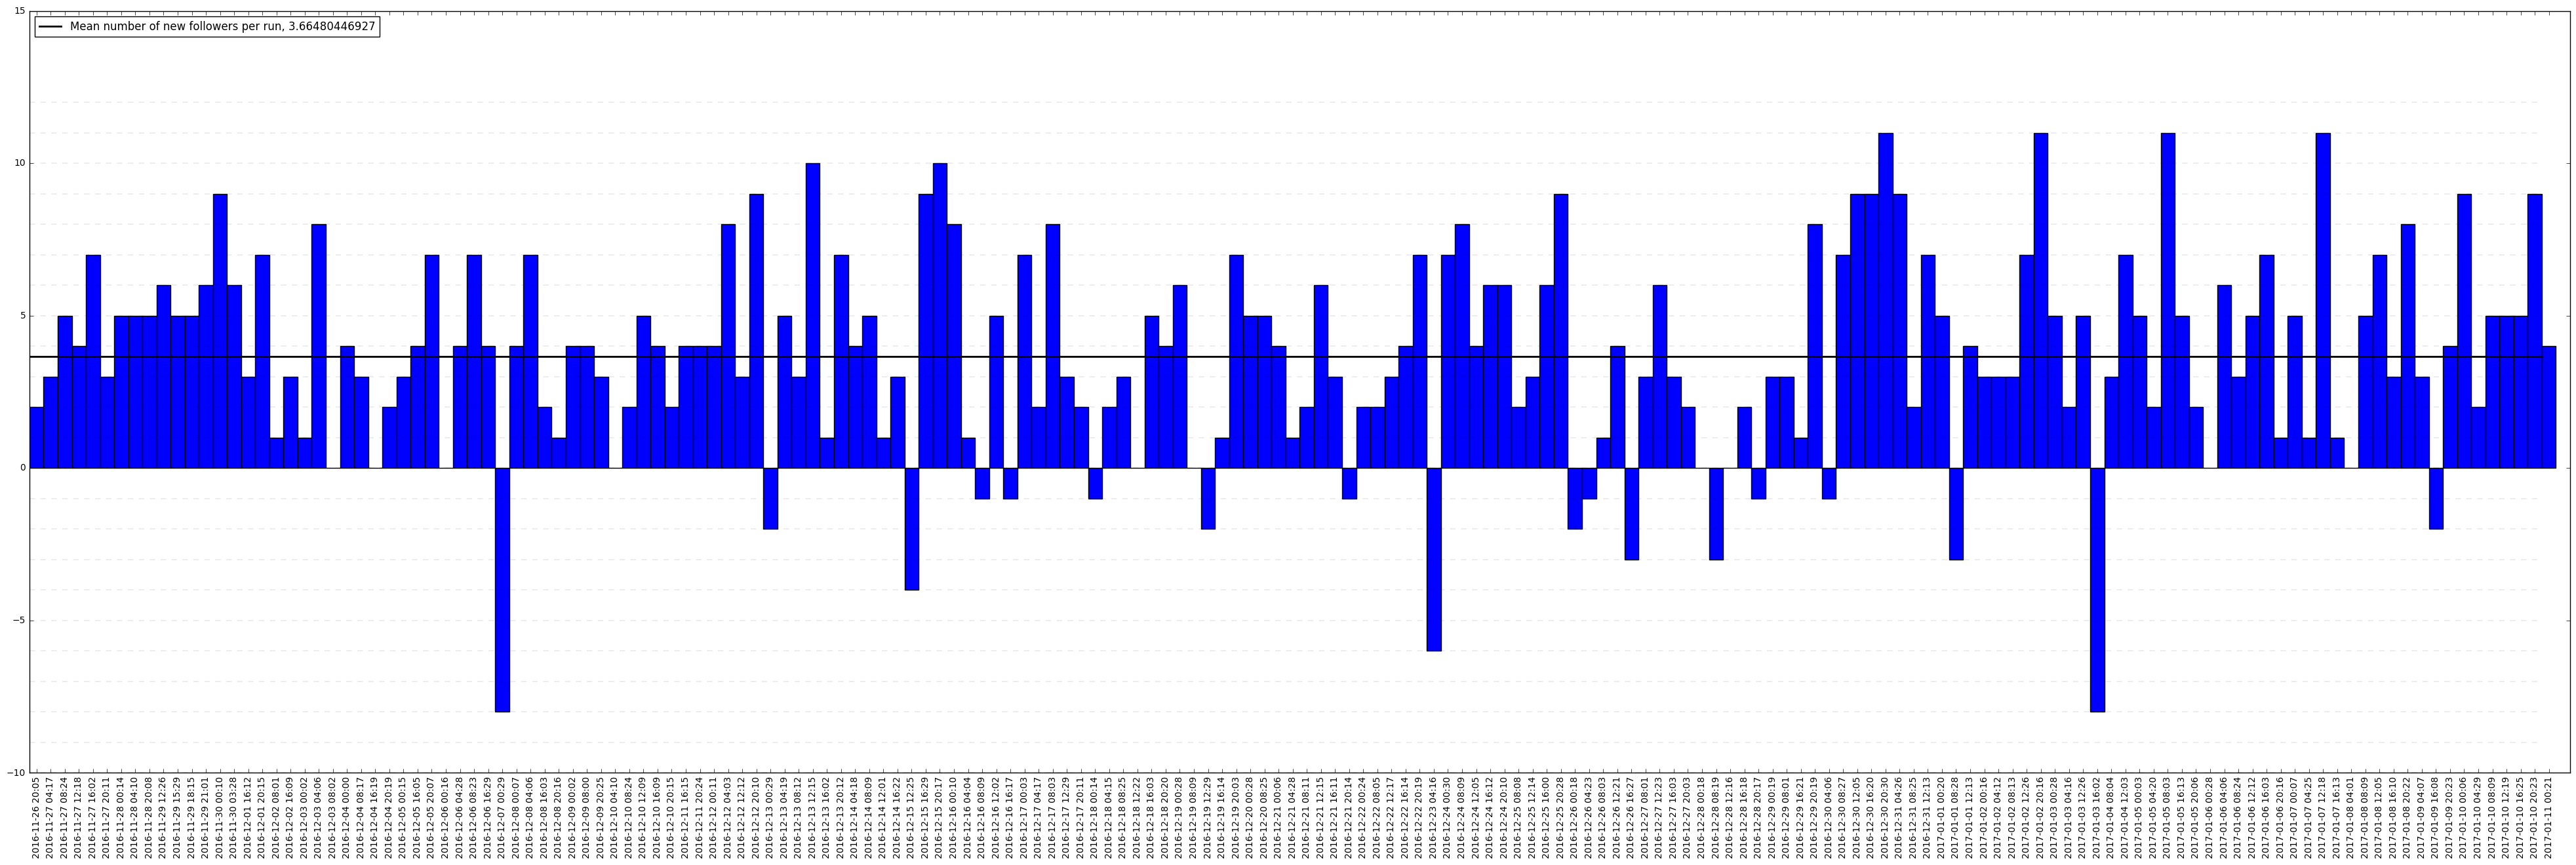

In [211]:
fig = plt.figure(figsize=(50, 15))
ax = fig.add_subplot(111)

diffs = []
for i in range(len(followerNum) - 1):
    diffs.append(followerNum[i + 1] - followerNum[i])

mean = np.mean(diffs)
index = np.arange(len(dates) - 1)

mean_line = np.empty(len(dates) - 1)
mean_line.fill(mean)
    
ax.bar(index, diffs, 1, color="blue")
ax.plot(index, mean_line, 'k-', linewidth="2", label="Mean number of new followers per run, " + str(mean))

for num in np.arange(np.min(diffs) - 2, np.max(diffs) + 2):
    line = np.empty(len(dates) - 1)
    line.fill(num)
    
    ax.plot(index, line, 'k--', linewidth="0.1")

ax.set_xticks(index + 0.5)
ax.set_xticklabels(dates, rotation="vertical")
plt.legend(loc=2,numpoints=1)

plt.show()

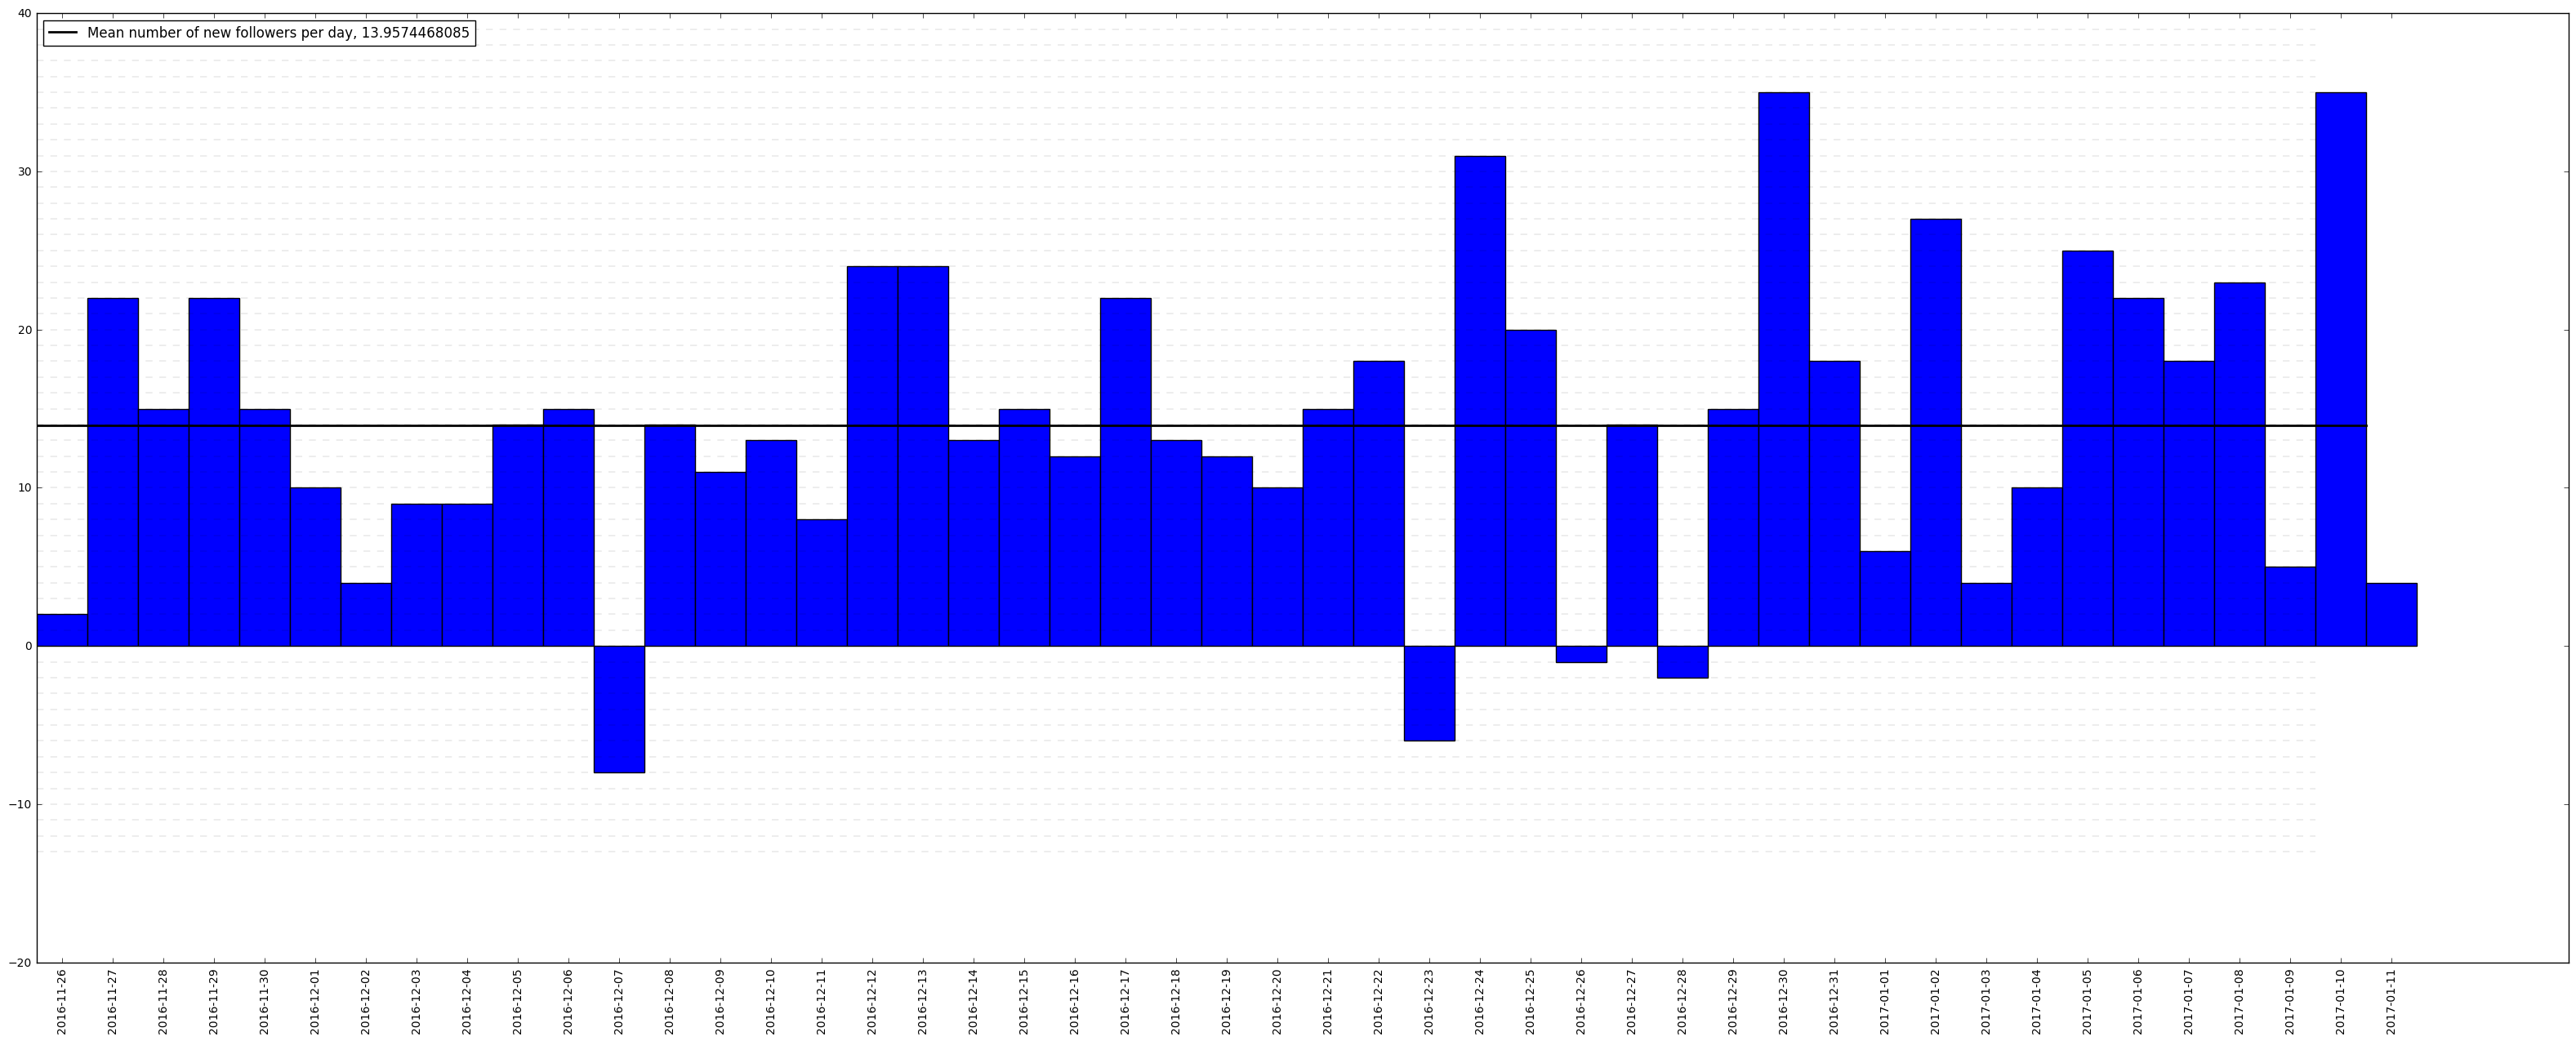

In [212]:
from collections import defaultdict

daily_grow = defaultdict(lambda: 0)

for pair in zip(diffs, dates):
    day = pair[1].split(' ')[0]
    daily_grow[day] = daily_grow[day] + pair[0]
    
daily_grow_sorted = sorted([pair for pair in daily_grow.items()], key=lambda x: x[0])

days = [pair[0] for pair in daily_grow_sorted]
growth = [pair[1] for pair in daily_grow_sorted]

mean_growth = np.mean(growth)

mean_growth_line = np.empty(len(days))
mean_growth_line.fill(mean_growth)

fig = plt.figure(figsize=(40, 15))
ax = fig.add_subplot(111)

for num in np.arange(np.min(growth) - 5, np.max(growth) + 5):
    line = np.empty(len(days) - 1)
    line.fill(num)
    
    ax.plot(np.arange(len(days) - 1), line, 'k--', linewidth="0.1")

ax.bar(np.arange(len(days)), growth, 1, color="blue")
ax.plot(np.arange(len(days)), mean_growth_line, 'k-', linewidth="2", label="Mean number of new followers per day, " + str(mean_growth))

ax.set_xticks(np.arange(len(days)) + 0.5)
ax.set_xticklabels(days, rotation="vertical")

plt.legend(loc=2,numpoints=1)
plt.show()

In [209]:
pairs = {}

for pair in zip(followerNum, dates):
    if '-26' in pair[1]:
        pairs[pair[1].split(' ')[0]] = pair[0]
        
print 'Followernum in month: ' + str(pairs)

Followernum in month: {'2016-12-26': 757, '2016-11-26': 357}
